<a href="https://colab.research.google.com/github/HWANG-HOE-SUN/Handson/blob/master/BigCon1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/HWANG-HOE-SUN/GitTest.git

Cloning into 'GitTest'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), done.


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

KeyboardInterrupt: ignored

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
# 한글출력
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False)

In [5]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 2019시청률데이터.xlsx to 2019시청률데이터.xlsx
Saving 2019실적데이터수정.xlsx to 2019실적데이터수정.xlsx
Saving naver_쇼핑데이터랩.csv to naver_쇼핑데이터랩.csv
Saving ns홈쇼핑앱애니.xlsx to ns홈쇼핑앱애니.xlsx
User uploaded file "2019시청률데이터.xlsx" with length 1819247 bytes
User uploaded file "2019실적데이터수정.xlsx" with length 1921555 bytes
User uploaded file "naver_쇼핑데이터랩.csv" with length 5490 bytes
User uploaded file "ns홈쇼핑앱애니.xlsx" with length 221738 bytes


In [7]:
import io
import csv
#sellData = pd.read_excel(uploaded['2019실적데이터.xlsx'],header=1)
sellData_re = pd.read_excel(uploaded['2019실적데이터수정.xlsx'],header=1)
watchData = pd.read_excel(uploaded['2019시청률데이터.xlsx'],header=1)
naver = pd.read_csv('naver_쇼핑데이터랩.csv')
App_annie = pd.read_excel(uploaded['ns홈쇼핑앱애니.xlsx'])

In [ ]:
# Weather = pd.read_csv(io.BytesIO(uploaded['기상청정보19-20.csv'])) 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **판매데이터 처리**

In [9]:
print(sellData_re.shape)
print(sellData_re.info())
sellData_re.head(10) # 노출(분) 같은거 귀찮아서 NaN으로 해둔게 많다. 실적도 Null존재(기존엔 5만원으로 처리했으나 사실 값없는거)

(38309, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38309 entries, 0 to 38308
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   방송일시    38309 non-null  datetime64[ns]
 1   노출(분)   21525 non-null  float64       
 2   마더코드    38309 non-null  int64         
 3   상품코드    38309 non-null  int64         
 4   상품명     38309 non-null  object        
 5   상품군     38309 non-null  object        
 6   판매단가    38309 non-null  int64         
 7   취급액     35379 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 2.3+ MB
None


,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0
5,2019-01-01 06:40:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,9337000.0
6,2019-01-01 07:00:00,20.0,100305,200974,오모떼 레이스 파운데이션 브라,속옷,59000,6819000.0
7,2019-01-01 07:20:00,20.0,100305,200974,오모떼 레이스 파운데이션 브라,속옷,59000,15689000.0
8,2019-01-01 07:40:00,20.0,100305,200974,오모떼 레이스 파운데이션 브라,속옷,59000,25370000.0
9,2019-01-01 08:00:00,20.0,100808,202377,CERINI by PAT 남성 소프트 기모 릴렉스팬츠,의류,59900,16133000.0


In [ ]:
sellData_re['상품군'].value_counts()

주방      6604
가전      6479
의류      4340
속옷      3919
잡화      3891
농수축     3884
생활용품    2877
가구      2614
이미용     1305
무형       937
건강기능     790
침구       669
Name: 상품군, dtype: int64

In [ ]:
print(watchData.shape)
print(watchData.info())
watchData.head(5)

(1441, 367)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Columns: 367 entries, 시간대 to 2019-01-01 to 2019-12-31
dtypes: float64(366), object(1)
memory usage: 4.0+ MB
None


,시간대,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,2019-01-12,2019-01-13,2019-01-14,2019-01-15,2019-01-16,2019-01-17,2019-01-18,2019-01-19,2019-01-20,2019-01-21,2019-01-22,2019-01-23,2019-01-24,2019-01-25,2019-01-26,2019-01-27,2019-01-28,2019-01-29,2019-01-30,2019-01-31,2019-02-01,2019-02-02,2019-02-03,2019-02-04,2019-02-05,2019-02-06,2019-02-07,2019-02-08,...,2019-11-23,2019-11-24,2019-11-25,2019-11-26,2019-11-27,2019-11-28,2019-11-29,2019-11-30,2019-12-01,2019-12-02,2019-12-03,2019-12-04,2019-12-05,2019-12-06,2019-12-07,2019-12-08,2019-12-09,2019-12-10,2019-12-11,2019-12-12,2019-12-13,2019-12-14,2019-12-15,2019-12-16,2019-12-17,2019-12-18,2019-12-19,2019-12-20,2019-12-21,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31,2019-01-01 to 2019-12-31
0,02:00,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.048,0.0,0.0,0.0,0.0,0.018,0.000,0.035,0.030,0.016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.003
1,02:01,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.005,0.0,0.0,0.0,0.0,0.0,0.0,0.006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038,0.0,...,0.0,0.0,0.0,0.0,0.0,0.022,0.0,0.0,0.0,0.000,0.048,0.0,0.0,0.0,0.0,0.018,0.000,0.035,0.030,0.016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.012,0.003
2,02:02,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.005,0.0,0.0,0.0,0.0,0.0,0.0,0.006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038,0.0,...,0.0,0.0,0.0,0.0,0.0,0.022,0.0,0.0,0.0,0.000,0.033,0.0,0.0,0.0,0.0,0.018,0.018,0.035,0.067,0.016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.004
3,02:03,0.0,0.0,0.014,0.0,0.0,0.0,0.0,0.0,0.0,0.005,0.0,0.0,0.0,0.0,0.0,0.0,0.006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038,0.0,...,0.0,0.0,0.0,0.0,0.0,0.022,0.0,0.0,0.0,0.000,0.033,0.0,0.0,0.0,0.0,0.018,0.018,0.035,0.067,0.016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012,0.0,0.0,0.0,0.0,0.017,0.0,0.0,0.0,0.0,0.0,0.000,0.004
4,02:04,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.005,0.0,0.0,0.0,0.0,0.0,0.0,0.006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.012,0.033,0.0,0.0,0.0,0.0,0.018,0.000,0.035,0.067,0.016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012,0.0,0.0,0.0,0.0,0.017,0.0,0.0,0.0,0.0,0.0,0.000,0.004


# 불필요 Data제거 및 결측치 처리

# 불필요 데이터(판매실적=0)







In [ ]:
sellData_re.columns

Index(['방송일시', '노출(분)', '마더코드', '상품코드', '상품명', '상품군', '판매단가', '취급액'], dtype='object')

In [ ]:
print(sellData_re[(sellData_re['상품군']=='무형')]) #937개가 무형제품.
sellData_re[(sellData_re['판매단가']==0)] #상품군 무형인 Data들은 모두 판매단가도 0임 이것들을 지우겠다.

                     방송일시      노출(분)    마더코드  ...  상품군 판매단가 취급액
2318  2019-01-25 19:00:00  60.000000  100507  ...   무형    0 NaN
2845  2019-01-31 18:00:00  60.000000  100507  ...   무형    0 NaN
3332  2019-02-05 18:00:00  60.000000  100507  ...   무형    0 NaN
6570  2019-03-09 00:00:00  20.000000  100324  ...   무형    0 NaN
6571  2019-03-09 00:20:00  20.000000  100324  ...   무형    0 NaN
...                   ...        ...     ...  ...  ...  ...  ..
38304 2020-01-01 00:20:00  20.000000  100073  ...   무형    0 NaN
38305 2020-01-01 00:40:00  20.000000  100073  ...   무형    0 NaN
38306 2020-01-01 01:00:00  20.000000  100073  ...   무형    0 NaN
38307 2020-01-01 01:20:00  20.000000  100490  ...   무형    0 NaN
38308 2020-01-01 01:40:00  17.166667  100490  ...   무형    0 NaN

[937 rows x 8 columns]


,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
2318,2019-01-25 19:00:00,60.000000,100507,201567,TCOM_처브치아보험,무형,0,NaN
2845,2019-01-31 18:00:00,60.000000,100507,201567,TCOM_처브치아보험,무형,0,NaN
3332,2019-02-05 18:00:00,60.000000,100507,201567,TCOM_처브치아보험,무형,0,NaN
6570,2019-03-09 00:00:00,20.000000,100324,201095,온라인투어 동남아 나트랑/빈펄랜드 (190309),무형,0,NaN
6571,2019-03-09 00:20:00,20.000000,100324,201095,온라인투어 동남아 나트랑/빈펄랜드 (190309),무형,0,NaN
...,...,...,...,...,...,...,...,...
38304,2020-01-01 00:20:00,20.000000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN
38305,2020-01-01 00:40:00,20.000000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN
38306,2020-01-01 01:00:00,20.000000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN
38307,2020-01-01 01:20:00,20.000000,100490,201478,더케이 예다함 상조서비스(티포트),무형,0,NaN


In [10]:
Intangible_data = sellData_re[sellData_re['판매단가']!=0] 
Selling = sellData_re[sellData_re['판매단가']!=0]


In [11]:
from datetime import datetime,timedelta

# 결측치( 노출('분) )

In [12]:
testsell = Selling.copy() #testsell에서 노출(분) 채우는 실험을 해보겠음.
Time_NaN_Index = testsell[testsell['노출(분)'].isnull()].index # 노출(분)이 채워지지 않은놈들의 인덱스

In [13]:
#노출(분) 채우는규칙? (같은 마더코드의) 같은 시간대인 놈의 노출(분)으로 채우면 될 듯.
#근데 한 시간대에 여러 마더코드가 있지 않으니.. 그냥 같은 시간대에 방송된 다른 notnull 노출(분)값을 넣자.
groupmax = testsell["노출(분)"].groupby(testsell['방송일시']).max()

# groupmax.index는 방송일시가 들어있다.
# Time_NaN_BroadTime에도 방송일시가 들어있다
# Time_NaN_Index엔 노출(분) Null인 인덱스(주소)가 들어있다.
# groupmax엔 방송일시별로 노출(분)이 들어있다.

for i in Time_NaN_Index:
  testsell['노출(분)'][i] = groupmax[testsell['방송일시'][i]]
testsell[348:] # 성공적으로 결측치를 대체했다.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
348,2019-01-05 01:20:00,20.0,100293,200949,무이자[가이거] 제니스시계 주얼리세트,잡화,139000,15561000.0
349,2019-01-05 01:40:00,17.1,100293,200952,일시불[가이거] 제니스시계 주얼리세트,잡화,129000,20633000.0
350,2019-01-05 01:40:00,17.1,100293,200949,무이자[가이거] 제니스시계 주얼리세트,잡화,139000,8495000.0
351,2019-01-05 06:00:00,20.0,100267,200883,스칼프솔루션 트리트먼트 패키지,이미용,50900,4976000.0
352,2019-01-05 06:20:00,20.0,100267,200883,스칼프솔루션 트리트먼트 패키지,이미용,50900,11784000.0
...,...,...,...,...,...,...,...,...
38299,2019-12-31 23:40:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000.0
38300,2020-01-01 00:00:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000.0
38301,2020-01-01 00:00:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000.0
38302,2020-01-01 00:00:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,13765000.0


In [14]:
Selling = testsell
del(testsell)
Selling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37372 entries, 0 to 38303
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   방송일시    37372 non-null  datetime64[ns]
 1   노출(분)   37372 non-null  float64       
 2   마더코드    37372 non-null  int64         
 3   상품코드    37372 non-null  int64         
 4   상품명     37372 non-null  object        
 5   상품군     37372 non-null  object        
 6   판매단가    37372 non-null  int64         
 7   취급액     35379 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 3.8+ MB


# 결측치( 취급액(기존에 5만원) )

In [15]:
Selling[Selling['취급액'].isnull()]

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
144,2019-01-02 22:00:00,20.0,100148,200432,무이자 LG 울트라HD TV 55UK6800HNC,가전,1440000,NaN
147,2019-01-02 22:00:00,20.0,100148,200518,일시불 LG 울트라HD TV 70UK7400KNA,가전,2700000,NaN
148,2019-01-02 22:00:00,20.0,100148,200451,무이자 LG 울트라HD TV 70UK7400KNA,가전,2990000,NaN
153,2019-01-02 22:20:00,20.0,100148,200518,일시불 LG 울트라HD TV 70UK7400KNA,가전,2700000,NaN
154,2019-01-02 22:20:00,20.0,100148,200451,무이자 LG 울트라HD TV 70UK7400KNA,가전,2990000,NaN
...,...,...,...,...,...,...,...,...
37709,2019-12-25 10:20:00,30.1,100036,200070,구찌 인터로킹 GG 탑핸들 체인 숄더 스몰,잡화,2590000,NaN
37967,2019-12-28 10:20:00,30.1,100036,200070,구찌 인터로킹 GG 탑핸들 체인 숄더 스몰,잡화,2590000,NaN
37969,2019-12-28 10:20:00,30.1,100039,200073,버버리 홀스페리 페이톤 크로스백,잡화,880000,NaN
38025,2019-12-28 21:20:00,20.0,100372,201169,(싱글+싱글)일월 품안애 온수매트,생활용품,198000,NaN


# 실적데이터 전체 기본분석(EDA)

In [16]:
#날짜데이터 분리
Selling["방송일시_년도"] = Selling["방송일시"].dt.year
Selling["방송일시_월"] = Selling["방송일시"].dt.month
Selling["방송일시_일"] = Selling["방송일시"].dt.day
Selling["방송일시_시"] = Selling["방송일시"].dt.hour
Selling["방송일시_분"] = Selling["방송일시"].dt.minute
Selling["방송일시_초"] = Selling["방송일시"].dt.second
Selling["방송일시_요일"] = Selling["방송일시"].dt.dayofweek
print(Selling.shape)
Selling[["방송일시", "방송일시_년도","방송일시_월","방송일시_일","방송일시_시","방송일시_분","방송일시_초","방송일시_요일"]].head() #0-월요일 ~ 6-일요일

(37372, 15)


,방송일시,방송일시_년도,방송일시_월,방송일시_일,방송일시_시,방송일시_분,방송일시_초,방송일시_요일
0,2019-01-01 06:00:00,2019,1,1,6,0,0,1
1,2019-01-01 06:00:00,2019,1,1,6,0,0,1
2,2019-01-01 06:20:00,2019,1,1,6,20,0,1
3,2019-01-01 06:20:00,2019,1,1,6,20,0,1
4,2019-01-01 06:40:00,2019,1,1,6,40,0,1


In [17]:
#파생변수 생성1 - 주문량
Selling['주문량']= Selling['취급액']/Selling['판매단가']
Selling['주문량'].head()

0     52.606516
1    109.548872
2     81.754386
3    174.310777
4    167.218045
Name: 주문량, dtype: float64

In [18]:
#파생변수 생성2 - 계절
# 계절 열 생성
Selling["계절"] = ""
Selling.head()

for i in Selling.index:
  if 3 <= Selling['방송일시_월'][i] <= 5:
    Selling['계절'][i] = 1
  elif 6<= Selling['방송일시_월'][i] <= 8:
    Selling['계절'][i] = 2
  elif 9<= Selling['방송일시_월'][i] <= 11:
    Selling['계절'][i] = 3
  else:
    Selling["계절"][i] = 4 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_laun

# **시각화**

In [19]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49569 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_

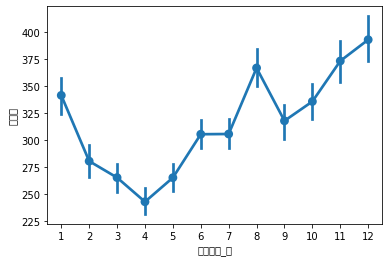

In [20]:
sns.pointplot(data=Selling,x="방송일시_월",y="주문량") #방송월별 주문량평균 그래프
# Selling.groupby('주문량)['방송일시_월'].mean() 이 결과와 동일

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51208 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text

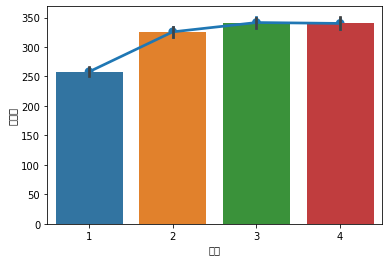

In [21]:
sns.pointplot(data=Selling,x="계절",y="주문량") #계절별 주문량 그래프 3(가을)에 제일 많고 1(봄)에 제일 적다.
sns.barplot(data=Selling,x="계절",y="주문량")

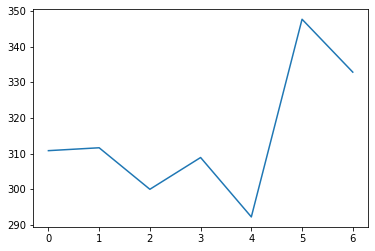

In [22]:
 # 요일별 취급액 합계 시각화
plt.plot(Selling.groupby("방송일시_요일")["주문량"].sum()/Selling.groupby("방송일시_요일")["주문량"].count())

In [23]:
(Selling.groupby("방송일시_요일")["주문량"].sum()/Selling.groupby("방송일시_요일")["주문량"].count()).describe()

count      7.000000
mean     314.872126
std       19.152065
min      292.212670
25%      304.431469
50%      310.817031
75%      322.247601
max      347.717041
Name: 주문량, dtype: float64

# **시청률데이터 처리**

실적에 대한 정의를 확실히 하고... 본질적으로 우리가 예측하는것이 어느시점에 발생하는 행위인지 정의해야 될듯.
시청률 집계방식-> 8시2분에 10%라면, 그 이전에 시청하던 시청자수를 집계해서 얻은 수치임(내가 아는바에 의하면)
실적이 발생하는 시점? 결제가 발생해서 실제로 수익이 난 시점! 시청률 발생시점, 집계시점, 실적시점이 다 서로 다를 수 있을거 같음.
근데 우리가 예측할건 분당 실적이다... 어떤 시점의 어느 행위를 예측하는가? 어떻게 실적을 분별로 예측할까.

# 상품군별 분리 및 분석

---


1.   주방
2.   가전
3.   의류
4.   속옷
5.   잡화
6.   농수축
7.   생활용품
8.   가구
9.   이미용
10.  건강기능
11.  침구




In [ ]:
Selling['상품군'].value_counts()

주방      6604
가전      6479
의류      4340
속옷      3919
잡화      3891
농수축     3884
생활용품    2877
가구      2614
이미용     1305
건강기능     790
침구       669
Name: 상품군, dtype: int64

In [ ]:
data = Selling.copy()
# 세환님 코드
funiture=[]#가구
HomeAppliances=[]#가전
Hearth=[]#건강기능
Agriculture=[]#농수축
Intangible=[]#무형
Householdgood=[]#생활용품
innerwear=[]#속옷
cloths=[]#의류
beauty=[]#미용
stuff=[]#잡화
kitchen=[]#주방
bedding=[]#침구

for i in range(len(data)):
    if data['상품군'].iloc[i] == "의류" :
        cloths.append(data['취급액'].iloc[i]/data['판매단가'].iloc[i])
    elif data['상품군'].iloc[i] == "가구" :
        funiture.append(data['취급액'].iloc[i]/data['판매단가'].iloc[i])
    elif data['상품군'].iloc[i] == "가전" :
        HomeAppliances.append(data['취급액'].iloc[i]/data['판매단가'].iloc[i])
    elif data['상품군'].iloc[i] == "건강기능" :
        Hearth.append(data['취급액'].iloc[i]/data['판매단가'].iloc[i])
    elif data['상품군'].iloc[i] == "농수축" :
        Agriculture.append(data['취급액'].iloc[i]/data['판매단가'].iloc[i])
    elif data['상품군'].iloc[i] == "무형" :
        Intangible.append(data['취급액'].iloc[i]/data['판매단가'].iloc[i])
    elif data['상품군'].iloc[i] == "생활용품" :
        Householdgood.append(data['취급액'].iloc[i]/data['판매단가'].iloc[i])
    elif data['상품군'].iloc[i] == "속옷" :
        innerwear.append(data['취급액'].iloc[i]/data['판매단가'].iloc[i])
    elif data['상품군'].iloc[i] == "이미용" :
        beauty.append(data['취급액'].iloc[i]/data['판매단가'].iloc[i])
    elif data['상품군'].iloc[i] == "잡화" :
        stuff.append(data['취급액'].iloc[i]/data['판매단가'].iloc[i])
    elif data['상품군'].iloc[i] == "주방" :
        kitchen.append(data['취급액'].iloc[i]/data['판매단가'].iloc[i])
    elif data['상품군'].iloc[i] == "침구" :
        bedding.append(data['취급액'].iloc[i]/data['판매단가'].iloc[i])

In [ ]:
plt.plot(funiture) #가구

In [ ]:
funiture

In [ ]:
data_Mother_grouped = data.groupby('마더코드')
MoMCodeGroup = data_Mother_grouped.sum()['주문량'] 

In [ ]:
plt.plot(MoMCodeGroup)

NameError: ignored

In [ ]:
data_Multi_grouped = data.groupby(['마더코드','상품군'])
MultiGroup = data_Multi_grouped['주문량'].sum()

NameError: ignored

In [ ]:
Furni_by_MoM = MultiGroup[:,'가구']
cloths_by_MoM = MultiGroup[:,'의류']
HomeAppliances_by_MoM = MultiGroup[:,'가전']
Hearth_by_MoM = MultiGroup[:,'건강기능']
Agriculture_by_MoM = MultiGroup[:,'농수축']
Intangible_by_MoM = MultiGroup[:,'가전']
Householdgood_by_MoM = MultiGroup[:,'생활용품']
innerwear_by_MoM = MultiGroup[:,'속옷']
beauty_by_MoM = MultiGroup[:,'이미용']
stuff_by_MoM = MultiGroup[:,'잡화']
kitchen_by_MoM = MultiGroup[:,'주방']
bedding_by_MoM = MultiGroup[:,'침구']

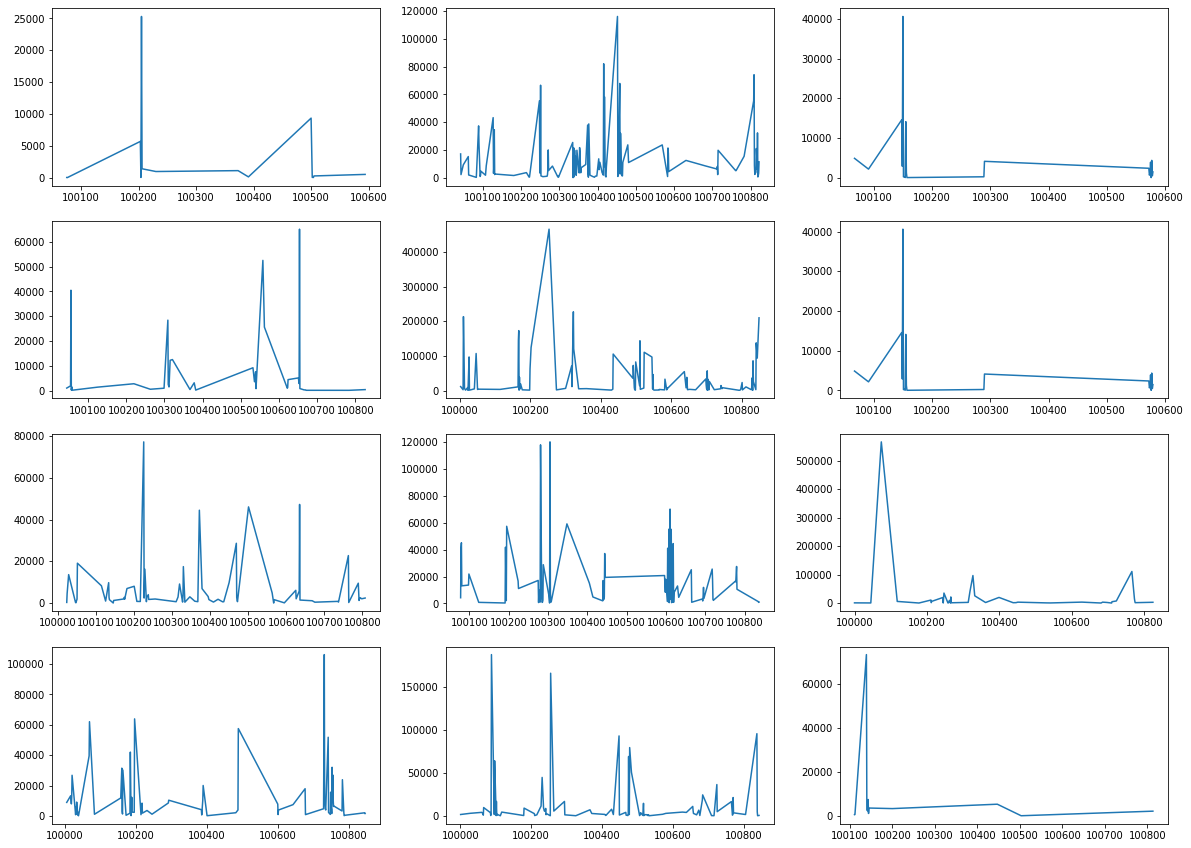

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,15)


plt.subplot2grid((4,3),(0,0)); plt.plot(Furni_by_MoM)
plt.subplot2grid((4,3),(0,1)); plt.plot(cloths_by_MoM)
plt.subplot2grid((4,3),(0,2)); plt.plot(HomeAppliances_by_MoM)
plt.subplot2grid((4,3),(1,0)); plt.plot(Hearth_by_MoM)
plt.subplot2grid((4,3),(1,1)); plt.plot(Agriculture_by_MoM)
plt.subplot2grid((4,3),(1,2)); plt.plot(Intangible_by_MoM)
plt.subplot2grid((4,3),(2,0)); plt.plot(Householdgood_by_MoM)
plt.subplot2grid((4,3),(2,1)); plt.plot(innerwear_by_MoM)
plt.subplot2grid((4,3),(2,2)); plt.plot(beauty_by_MoM)
plt.subplot2grid((4,3),(3,0)); plt.plot(stuff_by_MoM)
plt.subplot2grid((4,3),(3,1)); plt.plot(kitchen_by_MoM)
plt.subplot2grid((4,3),(3,2)); plt.plot(bedding_by_MoM)

# 미세먼지 데이터 추가 및 분석

In [101]:
from scipy import stats

In [27]:
#munji = pd.read_excel('2019미세먼지.xlsx')
munji = pd.read_excel('/content/drive/My Drive/빅콘폴더/인구 미세먼지관련/2019미세먼지.xlsx')

In [29]:
#population_only_total = pd.read_excel('2019총인구비율(수정).xlsx') # 지역별 인구수 ()
#population_only_woman = pd.read_excel('2019여성인구비율.xlsx')
population_only_total = pd.read_excel('/content/drive/My Drive/빅콘폴더/인구 미세먼지관련/2019총인구비율(수정).xlsx')
population_only_woman = pd.read_excel('/content/drive/My Drive/빅콘폴더/인구 미세먼지관련/2019여성인구비율.xlsx')
population_only_man = pd.read_excel('/content/drive/My Drive/빅콘폴더/인구 미세먼지관련/2019남자인구비율.xlsx')

In [33]:
print(munji) # 각 지역별 평균 미세먼지 양 수원=경기남 파주=경기북

     지역날짜  2019. 01  2019. 02  2019. 03  ...  2019. 09  2019. 10  2019. 11  2019. 12
0      서울        38        35        45  ...        12        15        20        28
1      부산        29        29        30  ...        13        13        17        23
2      울산        26        26        29  ...        13        11        15        20
3  수원(경기)        40        36        46  ...        13        16        21        29
4  파주(경기)        47        39        49  ...        15        20        27        35
5  강릉(강원)        23        25        32  ...        10        13        15        17
6      광주        33        34        39  ...        15        18        21        22
7      대구        33        32        33  ...        13        14        21        29
8      대전        35        36        39  ...        12        15        21        25

[9 rows x 13 columns]


In [34]:
munji_df = munji.set_index("지역날짜")
population_total_df = population_only_total.set_index('행정구역(시군구)별')

In [35]:
population_total_df,munji_df

(              1월총인구수    2월총인구수    3월총인구수  ...   10월총인구수   11월총인구수   12월총인구수
 행정구역(시군구)별                                ...                              
 서울특별시       0.188443  0.188527  0.188519  ...  0.187864  0.187792  0.187725
 부산광역시       0.066342  0.066303  0.066262  ...  0.065968  0.065926  0.065871
 울산광역시       0.022282  0.022262  0.022244  ...  0.022178  0.022169  0.022151
 경기남         0.126294  0.126429  0.126544  ...  0.127531  0.127620  0.127731
 경기북         0.126294  0.126429  0.126544  ...  0.127531  0.127620  0.127731
 강원도         0.029747  0.029723  0.029724  ...  0.029732  0.029742  0.029744
 광주광역시       0.028168  0.028156  0.028150  ...  0.028159  0.028150  0.028103
 대구광역시       0.047474  0.047430  0.047386  ...  0.047148  0.047111  0.047042
 대전광역시       0.028725  0.028704  0.028685  ...  0.028527  0.028498  0.028458
 
 [9 rows x 12 columns],
         2019. 01  2019. 02  2019. 03  ...  2019. 10  2019. 11  2019. 12
 지역날짜                                  ...            

총 인구수만 고려, 위 두 행렬값들을 각각 곱한 결과

In [118]:
total_weighted_munji = pd.DataFrame(total_weighted_munji).reindex_like(munji_df)
total_weighted_munji

,2019. 01,2019. 02,2019. 03,2019. 04,2019. 05,2019. 06,2019. 07,2019. 08,2019. 09,2019. 10,2019. 11,2019. 12
지역날짜,,,,,,,,,,,,
서울,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
부산,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
울산,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
수원(경기),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
파주(경기),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
강릉(강원),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
광주,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
대구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
대전,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
for i in range(9):
  for j in range(12):
    total_weighted_munji.iloc[i][j] = munji_df.iloc[i][j]*population_total_df.iloc[i][j]
total_weighted_munji

,2019. 01,2019. 02,2019. 03,2019. 04,2019. 05,2019. 06,2019. 07,2019. 08,2019. 09,2019. 10,2019. 11,2019. 12
지역날짜,,,,,,,,,,,,
서울,7.160824,6.598434,8.483334,3.957540,5.462475,3.765326,3.574960,3.008477,2.255318,2.817959,3.755846,5.256309
부산,1.923918,1.922782,1.987847,1.324328,1.654370,1.388876,1.189661,1.254980,0.858243,0.857583,1.120749,1.515029
울산,0.579328,0.578801,0.645063,0.422441,0.577773,0.488722,0.421927,0.399513,0.288432,0.243959,0.332531,0.443026
수원(경기),5.051741,4.551446,5.821010,2.533368,3.677853,2.412139,2.288107,2.291221,1.656436,2.040495,2.680027,3.704204
파주(경기),5.935795,4.930733,6.200641,2.786705,3.677853,2.285184,2.415224,2.291221,1.911272,2.550619,3.445749,4.470591
강릉(강원),0.684188,0.743081,0.951170,0.475680,0.624322,0.475698,0.416198,0.356756,0.297286,0.386515,0.446125,0.505642
광주,0.929537,0.957296,1.097865,0.563012,0.619339,0.703805,0.478739,0.478723,0.422459,0.506856,0.591152,0.618263
대구,1.566630,1.517771,1.563731,0.899716,1.088303,0.945651,0.755961,0.755368,0.613367,0.660078,0.989328,1.364229
대전,1.005385,1.033332,1.118722,0.487275,0.630120,0.515045,0.400257,0.428505,0.342600,0.427901,0.598462,0.711449


In [108]:
print(len(total_weighted_munji))

108


방송일시_월
1     158.744350
2     177.516535
3     160.940525
4     180.625917
5     193.959307
6     197.926321
7     206.867241
8     185.926513
9     178.280312
10    180.734125
11    222.261799
12    272.388709
Name: 주문량, dtype: float64

In [ ]:
total_weighted_munji

In [ ]:
result_munji_df = result_munji.set_index('행정구역(시군구)별')
result_munji_df

In [ ]:
total_weighted_munji = result_munji_df.sum()
total_weighted_munji

In [ ]:
result_munji = pd.read_excel('2019여성가중치미세먼지.xlsx')

In [ ]:
population_only_woman

,행정구역(시군구)별,1월여자인구수,2월여자인구수,3월여자인구수,4월여자인구수,5월여자인구수,6월여자인구수,7월여자인구수,8월여자인구수,9월여자인구수,10월여자인구수,11월여자인구수,12월여자인구수
0,서울특별시,0.096350,0.096419,0.096439,0.096426,0.096399,0.096369,0.096328,0.096281,0.096258,0.096230,0.096205,0.096188
1,부산광역시,0.033723,0.033708,0.033695,0.033680,0.033666,0.033652,0.033634,0.033616,0.033605,0.033583,0.033565,0.033543
2,울산광역시,0.010831,0.010822,0.010814,0.010810,0.010805,0.010802,0.010800,0.010794,0.010791,0.010788,0.010783,0.010773
3,경기남,0.062767,0.062831,0.062885,0.062945,0.063018,0.063083,0.063162,0.063248,0.063311,0.063370,0.063420,0.063478
4,경기북,0.062767,0.062831,0.062885,0.062945,0.063018,0.063083,0.063162,0.063248,0.063311,0.063370,0.063420,0.063478
5,강원도,0.014780,0.014770,0.014770,0.014776,0.014777,0.014779,0.014779,0.014780,0.014780,0.014781,0.014783,0.014782
6,광주광역시,0.014219,0.014211,0.014209,0.014210,0.014210,0.014210,0.014215,0.014217,0.014221,0.014219,0.014216,0.014196
7,대구광역시,0.023963,0.023944,0.023928,0.023917,0.023903,0.023888,0.023873,0.023854,0.023843,0.023832,0.023815,0.023786
8,대전광역시,0.014373,0.014365,0.014356,0.014344,0.014334,0.014319,0.014307,0.014296,0.014289,0.014279,0.014266,0.014245


In [ ]:
population_df = population_only_woman.set_index('행정구역(시군구)별')
population_df

,1월여자인구수,2월여자인구수,3월여자인구수,4월여자인구수,5월여자인구수,6월여자인구수,7월여자인구수,8월여자인구수,9월여자인구수,10월여자인구수,11월여자인구수,12월여자인구수
행정구역(시군구)별,,,,,,,,,,,,
서울특별시,0.096350,0.096419,0.096439,0.096426,0.096399,0.096369,0.096328,0.096281,0.096258,0.096230,0.096205,0.096188
부산광역시,0.033723,0.033708,0.033695,0.033680,0.033666,0.033652,0.033634,0.033616,0.033605,0.033583,0.033565,0.033543
울산광역시,0.010831,0.010822,0.010814,0.010810,0.010805,0.010802,0.010800,0.010794,0.010791,0.010788,0.010783,0.010773
경기남,0.062767,0.062831,0.062885,0.062945,0.063018,0.063083,0.063162,0.063248,0.063311,0.063370,0.063420,0.063478
경기북,0.062767,0.062831,0.062885,0.062945,0.063018,0.063083,0.063162,0.063248,0.063311,0.063370,0.063420,0.063478
강원도,0.014780,0.014770,0.014770,0.014776,0.014777,0.014779,0.014779,0.014780,0.014780,0.014781,0.014783,0.014782
광주광역시,0.014219,0.014211,0.014209,0.014210,0.014210,0.014210,0.014215,0.014217,0.014221,0.014219,0.014216,0.014196
대구광역시,0.023963,0.023944,0.023928,0.023917,0.023903,0.023888,0.023873,0.023854,0.023843,0.023832,0.023815,0.023786
대전광역시,0.014373,0.014365,0.014356,0.014344,0.014334,0.014319,0.014307,0.014296,0.014289,0.014279,0.014266,0.014245


In [ ]:
result_munji_df = result_munji.set_index('행정구역(시군구)별')
result_munji_df

,1월먼지,2월먼지,3월먼지,4월먼지,5월먼지,6월먼지,7월먼지,8월먼지,9월먼지,10월먼지,11월먼지,12월먼지
행정구역(시군구)별,,,,,,,,,,,,
서울특별시,3.628946,3.344483,4.300523,2.006478,2.769829,1.909490,1.813128,1.525994,1.144122,1.429660,1.905628,2.667214
부산광역시,0.971562,0.971081,1.004084,0.669027,0.835870,0.701785,0.601176,0.634219,0.433765,0.433468,0.566514,0.765903
울산광역시,0.284835,0.284589,0.317172,0.207725,0.284116,0.240337,0.207507,0.196476,0.141856,0.119989,0.163550,0.217877
경기남,2.516746,2.267440,2.899827,1.262008,1.832089,1.201568,1.139771,1.141328,0.825111,1.016450,1.335093,1.845360
경기북,2.957177,2.456393,3.088946,1.388209,1.832089,1.138328,1.203092,1.141328,0.952051,1.270563,1.716548,2.227159
강원도,0.340806,0.370161,0.473818,0.236987,0.311059,0.237016,0.207382,0.177767,0.148140,0.192596,0.222272,0.251909
광주광역시,0.467448,0.481370,0.552072,0.283121,0.311445,0.353915,0.240736,0.240761,0.212483,0.254935,0.297348,0.311040
대구광역시,0.787790,0.763279,0.786513,0.452594,0.547520,0.475787,0.380370,0.380073,0.308650,0.332200,0.497939,0.686724
대전광역시,0.502900,0.516944,0.559667,0.243767,0.315237,0.257655,0.200229,0.214368,0.171399,0.214093,0.299443,0.355964


In [ ]:
woman_weighted_munji = result_munji_df.sum()
woman_weighted_munji

1월먼지     12.458211
2월먼지     11.455741
3월먼지     13.982621
4월먼지      6.749916
5월먼지      9.039254
6월먼지      6.515881
7월먼지      5.993392
8월먼지      5.652313
9월먼지      4.337577
10월먼지     5.263954
11월먼지     7.004334
12월먼지     9.329150
dtype: float64

In [107]:
grouped_month_item = New_data.groupby(['상품군','방송일시_월']).mean()
grouped_month_item
#grouped_day_item = New_data.groupby(['상품군','DATE']).sum()

노출(분)           마더코드  ...         주문량          DATE
상품군 방송일시_월                            ...                          
가구  2       20.000000  100359.347826  ...   23.161003  2.019022e+07
    3       20.521173  100423.013029  ...   19.138944  2.019031e+07
    4       20.990712  100372.182663  ...   18.013451  2.019041e+07
    5       20.000000  100304.290323  ...   16.559247  2.019051e+07
    6       20.000000  100290.763441  ...   17.461582  2.019061e+07
...               ...            ...  ...         ...           ...
침구  7       19.921311  100152.098361  ...  169.893573  2.019071e+07
    8       20.000000  100261.750000  ...  160.269365  2.019082e+07
    9       19.511481  100154.666667  ...   43.529366  2.019091e+07
    10      20.000000  100374.058824  ...  113.861109  2.019102e+07
    11      19.841270  100143.571429  ...  116.723763  2.019111e+07

[127 rows x 13 columns]

In [ ]:
population_only_woman, population_only_man

(  행정구역(시군구)별   1월여자인구수   2월여자인구수  ...  10월여자인구수  11월여자인구수  12월여자인구수
 0      서울특별시  0.096350  0.096419  ...  0.096230  0.096205  0.096188
 1      부산광역시  0.033723  0.033708  ...  0.033583  0.033565  0.033543
 2      울산광역시  0.010831  0.010822  ...  0.010788  0.010783  0.010773
 3        경기남  0.062767  0.062831  ...  0.063370  0.063420  0.063478
 4        경기북  0.062767  0.062831  ...  0.063370  0.063420  0.063478
 5        강원도  0.014780  0.014770  ...  0.014781  0.014783  0.014782
 6      광주광역시  0.014219  0.014211  ...  0.014219  0.014216  0.014196
 7      대구광역시  0.023963  0.023944  ...  0.023832  0.023815  0.023786
 8      대전광역시  0.014373  0.014365  ...  0.014279  0.014266  0.014245
 
 [9 rows x 13 columns],
     1월남자인구수   2월남자인구수   3월남자인구수  ...  10월남자인구수  11월남자인구수  12월남자인구수
 0  0.092093  0.092108  0.092079  ...  0.091634  0.091587  0.091538
 1  0.032619  0.032595  0.032566  ...  0.032384  0.032361  0.032328
 2  0.011450  0.011439  0.011430  ...  0.011391  0.011386  0.011379
 3  0.063527

In [ ]:
population_woman_df = population_only_woman.set_index('행정구역(시군구)별')
population_man_df = population_only_man.set_index('행정구역(시군구)별')
population_woman_df,population_man_df

KeyError: ignored

#여성:남성 비율 조정해서 곱해보기(홈쇼핑 이용성비 8:2정도라면 반영해보기)

#여성 인구수만 고려, 엑셀에서 곱한 결과

In [ ]:
#print(Final_munji)
month_gagu = grouped_month_item.xs('가구')['주문량']
month_gagu

방송일시_월
2     23.161003
3     19.138944
4     18.013451
5     16.559247
6     17.461582
7     20.095313
8     21.301611
9     24.749184
10    24.068045
11    20.949684
12    10.723672
Name: 주문량, dtype: float64

In [ ]:
Final_munji_gagu = woman_weighted_munji[1:12]
Final_munji_gagu

2월먼지     11.455741
3월먼지     13.982621
4월먼지      6.749916
5월먼지      9.039254
6월먼지      6.515881
7월먼지      5.993392
8월먼지      5.652313
9월먼지      4.337577
10월먼지     5.263954
11월먼지     7.004334
12월먼지     9.329150
dtype: float64

In [ ]:
stats.linregress(Final_munji_gagu,month_gagu)

LinregressResult(slope=-0.44074819908640467, intercept=23.075290435594447, rvalue=-0.3220621474183821, pvalue=0.33410965514506213, stderr=0.43186746207678867)

In [ ]:
month_health = grouped_month_item.xs('건강기능')['주문량']
month_health

방송일시_월
1     222.692689
2     376.908970
3     367.402775
4     320.049258
5     273.655106
6     458.194428
7     408.675981
8     271.627928
9     394.479894
10    388.529158
11    352.627425
12    521.804674
Name: 주문량, dtype: float64

In [ ]:
obj = pd.Series()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [ ]:
stats.linregress(Final_munji,month_health)

#상품군별로 월별 평균주문량 vs 월별 평균 미세먼지 비교(아래 제품군 공통사항)

In [ ]:
#gun_list = ['주방','가전','의류','속옷','잡화','농수축','생활용품','이미용','침구']
month_jubang = grouped_month_item.xs('주방')['주문량']
month_jubang

# 1.주방용품

1년간 일별 주문량 합계 (DATE변수추가)

In [103]:
New_data = Selling.copy()
New_data['DATE'] = New_data['방송일시'].map(lambda x: 10000*x.to_pydatetime().year + 100*x.to_pydatetime().month + x.to_pydatetime().day)

In [104]:
grouped_day_item = New_data.groupby(['상품군','DATE']).sum()
grouped_day_item

노출(분)     마더코드     상품코드  ...  방송일시_초  방송일시_요일          주문량
상품군 DATE                               ...                              
가구  20190201  180.0   901845  1806588  ...       0       36   285.268734
    20190204  180.0   901845  1806588  ...       0        0   253.090929
    20190206  180.0   901845  1806588  ...       0       18   303.985646
    20190208  180.0   901845  1806588  ...       0       36   373.762817
    20190212  360.0  1809000  3627108  ...       0       18   295.627299
...             ...      ...      ...  ...     ...      ...          ...
침구  20191111  240.0  1201716  2404746  ...       0        0  1324.517211
    20191113  240.0  1201716  2404746  ...       0       24  1512.708542
    20191119  240.0  1201716  2404746  ...       0       12  1525.351548
    20191121  240.0  1201716  2404746  ...       0       36  1637.059339
    20191124  240.0  1201716  2404746  ...       0       72  1500.644634

[2984 rows x 13 columns]

In [105]:
grouped_day_item = grouped_day_item['취급액']/grouped_day_item['판매단가']
grouped_day_item = pd.DataFrame(grouped_day_item)

In [ ]:
Selling_Kitchen = Selling[Selling['상품군']=='주방']
print(Selling_Kitchen.info())
Selling_Kitchen.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6604 entries, 20 to 38303
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   방송일시     6604 non-null   datetime64[ns]
 1   노출(분)    6604 non-null   float64       
 2   마더코드     6604 non-null   int64         
 3   상품코드     6604 non-null   int64         
 4   상품명      6604 non-null   object        
 5   상품군      6604 non-null   object        
 6   판매단가     6604 non-null   int64         
 7   취급액      6571 non-null   float64       
 8   방송일시_년도  6604 non-null   int64         
 9   방송일시_월   6604 non-null   int64         
 10  방송일시_일   6604 non-null   int64         
 11  방송일시_시   6604 non-null   int64         
 12  방송일시_분   6604 non-null   int64         
 13  방송일시_초   6604 non-null   int64         
 14  방송일시_요일  6604 non-null   int64         
 15  주문량      6571 non-null   float64       
 16  계절       6604 non-null   object        
dtypes: datetime64[ns](1), float64(3

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,방송일시_년도,방송일시_월,방송일시_일,방송일시_시,방송일시_분,방송일시_초,방송일시_요일,주문량,계절
20,2019-01-01 12:00:00,20.0,100088,200236,에코라믹 통주물 스톤 냄비세트,주방,60900,33823000.0,2019,1,1,12,0,0,1,555.385878,4
21,2019-01-01 12:20:00,20.0,100088,200236,에코라믹 통주물 스톤 냄비세트,주방,60900,59083000.0,2019,1,1,12,20,0,1,970.164204,4
22,2019-01-01 12:40:00,20.0,100088,200236,에코라믹 통주물 스톤 냄비세트,주방,60900,99235000.0,2019,1,1,12,40,0,1,1629.474548,4
79,2019-01-02 10:00:00,20.0,100448,202098,일시불 쿠첸 풀스텐 압력밥솥 10인용 (A1),주방,158000,7239000.0,2019,1,2,10,0,0,2,45.816456,4
80,2019-01-02 10:00:00,20.0,100448,202093,무이자 쿠첸 풀스텐 압력밥솥 10인용(A1),주방,168000,8951000.0,2019,1,2,10,0,0,2,53.279762,4


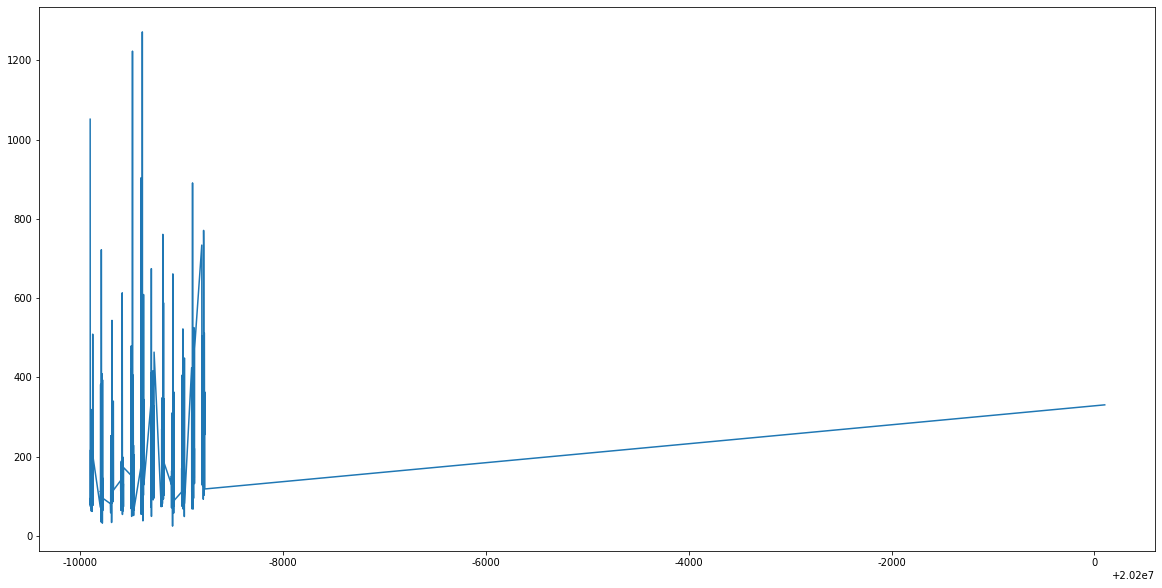

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,10)
# 잘못된 그림 예시
plt.plot(grouped_day_item.xs('주방')[0]) # 20200101의 날짜값때문에 오른쪽끝으로 쏠리는 현상이 발생!

In [ ]:
kitchen_date = grouped_day_item.xs('주방').index

In [ ]:
for i in range(len(kitchen_date)-1):
  if kitchen_date[i+1] - kitchen_date[i]>1:
    print(kitchen_date[i+1]) # 20191201 과 20200101사이의 숫자간 거리가 멀어서 그래프 플롯이 이상하다.

20190201
20190301
20190325
20190401
20190501
20190520
20190527
20190601
20190701
20190801
20190816
20190901
20190912
20191001
20191006
20191012
20191021
20191101
20191201
20200101


In [ ]:
kitchen_sell_bydate = grouped_day_item.xs('주방')
print(kitchen_sell_bydate)

                    0
DATE                 
20190101  1051.674877
20190102    78.591523
20190103    94.933461
20190104    74.369238
20190105   217.122354
...               ...
20191228   254.800190
20191229   274.747155
20191230   363.341094
20191231   118.530814
20200101   330.819018

[358 rows x 1 columns]


In [ ]:
kitchen_sell_bydate = kitchen_sell_bydate.rename(index={20200101:20191232}) #20201231 -> 20201232로 바꿔서 그래프를 다시 그리겠다.

In [ ]:
kitchen_sell_bydate

,0
DATE,
20190101,1051.674877
20190102,78.591523
20190103,94.933461
20190104,74.369238
20190105,217.122354
...,...
20191228,254.800190
20191229,274.747155
20191230,363.341094


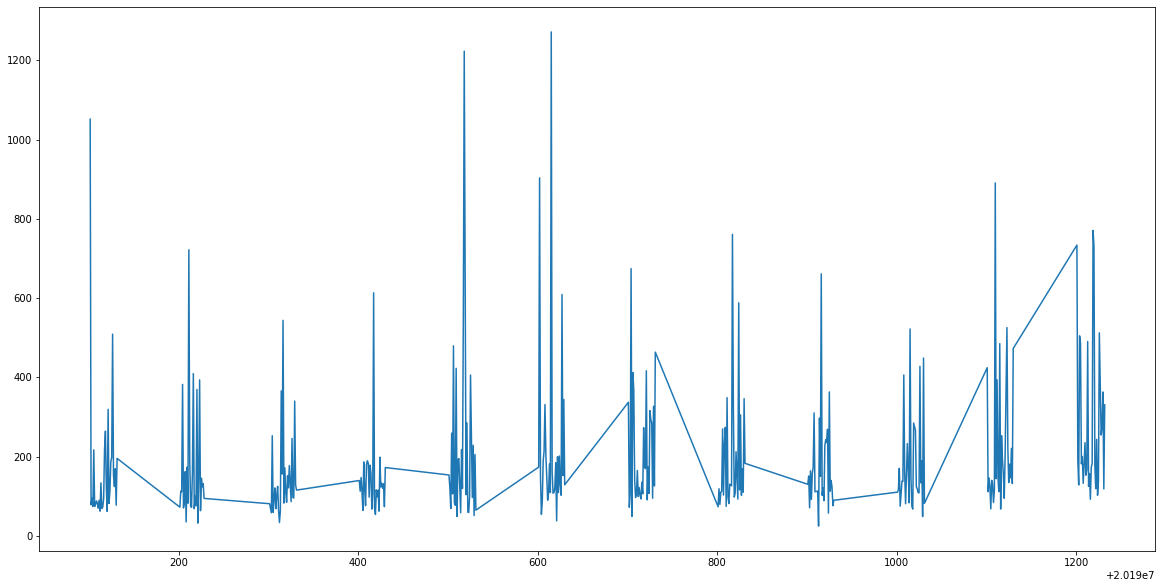

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,10)

plt.plot(kitchen_sell_bydate)
# ※plt.bar(kitchen_sell_bydate.index, kitchen_sell_bydate[0])으로 확인(막대그래프)시 중간중간 선값이 없음. 즉, 이 그림에서 중간연결선은 허구(없는데이터)

In [ ]:
bigsell = kitchen_sell_bydate[0][kitchen_sell_bydate[0]>600]
smallsell = kitchen_sell_bydate[0][kitchen_sell_bydate[0]<=600]  #각각에 대해 plot을 그려 봤다.(큰차인 없음. small의 경우)

# 2.의류

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


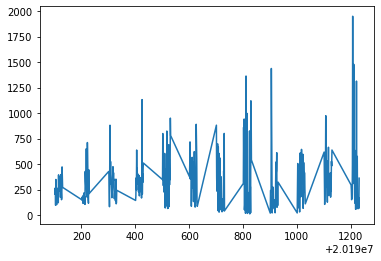

In [ ]:
plt.plot(grouped_day_item.xs('의류')[0]) # 근데이거 주문량이 아니라 주문량*단가해서 Naver랩자료랑 비교해야할듯 (카드소비는 주문량이아닌, 실적이랑 가까운 의미니까)

# Naver쇼핑랩 vs NS쇼핑 실적비교 => 관련없음

In [ ]:
X2 = grouped_day_item.xs('의류').values
print(len(X2))
len(naver)

355


365

In [ ]:
grouped_day_item.xs('의류').index

Int64Index([20190101, 20190102, 20190103, 20190104, 20190105, 20190106,
            20190107, 20190108, 20190109, 20190110,
            ...
            20191222, 20191223, 20191224, 20191225, 20191226, 20191227,
            20191228, 20191229, 20191230, 20191231],
           dtype='int64', name='DATE', length=355)

In [ ]:
Missing=['2019-01-31','2019-02-23','2019-06-27','2019-09-03','2019-09-06',
         '2019-09-09','2019-09-10','2019-10-21','2019-10-30','2019-11-15']

In [ ]:
for i in grouped_day_item.xs('의류').index: #의류측 판매결측자료 찾기
  print(i)

In [ ]:
naver

,sellratio
date,
2019-01-01,60
2019-01-02,58
2019-01-03,55
2019-01-04,51
2019-01-05,57
...,...
2019-12-27,47
2019-12-28,53
2019-12-29,61


In [ ]:
s1 = naver['date']
s2 = pd.Series(Missing)
real_sell_date = np.setdiff1d(s1,s2) #naver카드사날짜중, Ns결측날짜만 제거해서 다시 저장

In [ ]:
len(real_sell_date)

355

In [ ]:
naver['date'].isin(real_sell_date) # real_sell_date에 해당되는 날짜만 boolean으로 뽑아보겠음.

0      True
1      True
2      True
3      True
4      True
       ... 
360    True
361    True
362    True
363    True
364    True
Name: date, Length: 365, dtype: bool

In [ ]:
naver = naver[naver['date'].isin(real_sell_date)] #naver데이터 수정(의류쪽과 비교 위함)

In [ ]:
New_grouped_day_item = New_data.groupby(['상품군','DATE']).sum()
New_grouped_day_item = pd.DataFrame(New_grouped_day_item.xs('의류')['취급액'])
New_grouped_day_item

,취급액
DATE,
20190101,873559000.0
20190102,230358000.0
20190103,216831000.0
20190104,239274000.0
20190105,496405000.0
...,...
20191227,268513000.0
20191228,280987000.0
20191229,153446000.0


In [ ]:
#아래의 과정을 위한 naver자료 전처리
naver.index = naver['date']
del naver['date']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
compare_shop = minmax_scaler.fit_transform(New_grouped_day_item)
compare_naver = minmax_scaler.fit_transform(naver)
compare_naver,compare_shop 

(array([40., 79., 76., 52., 41., 32., 16.,  6.,  6.,  7.]),
 array([0.03025554, 0.12722999, 0.22420443, 0.32117888, 0.41815332,
        0.51512777, 0.61210222, 0.70907666, 0.80605111, 0.90302555,
        1.        ]),
 <a list of 10 Patch objects>)

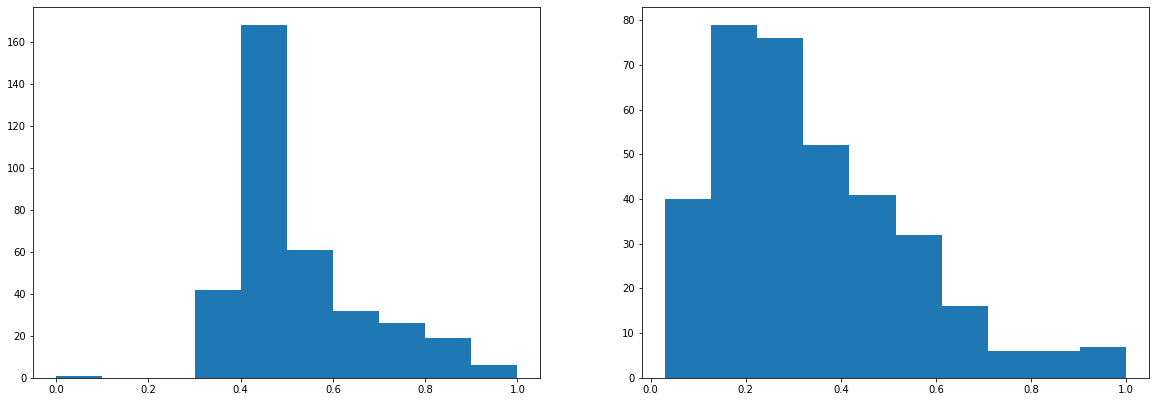

In [ ]:
plt.rcParams['figure.figsize'] = (20,15)
plt.subplot(221);plt.hist(compare_naver, bins=10)
plt.subplot(222);plt.hist(compare_shop,bins=10)

In [ ]:
import seaborn as sns

{'boxes': [<matplotlib.lines.Line2D at 0x7f32607b9c18>],
 'caps': [<matplotlib.lines.Line2D at 0x7f32607c7668>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3260752128>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f32607c7d68>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f32607b9f28>,
  <matplotlib.lines.Line2D at 0x7f32607c72e8>]}

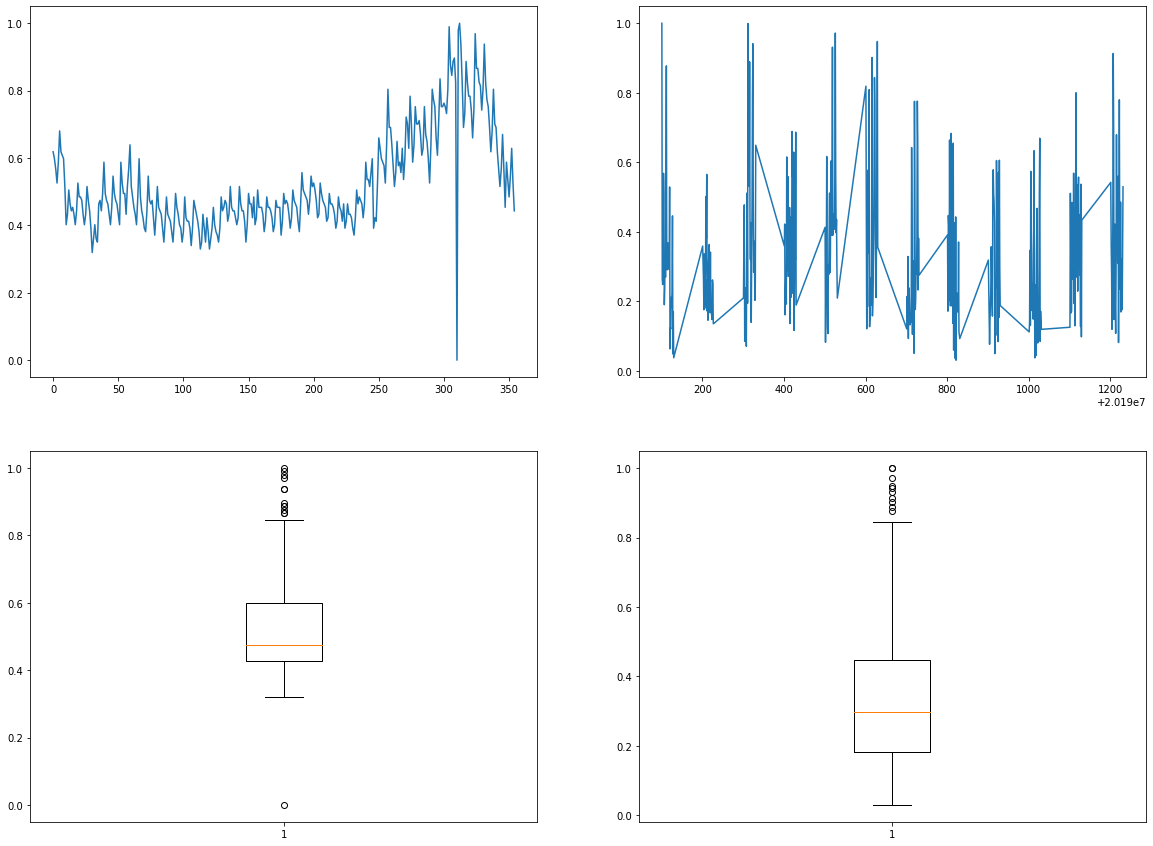

In [ ]:
plt.rcParams['figure.figsize'] = (20,15)
plt.subplot2grid((2,2),(0,0)); plt.plot(compare_naver)
plt.subplot2grid((2,2),(0,1)); plt.plot(compare_shop)
plt.subplot2grid((2,2),(1,0)); plt.boxplot(compare_naver)
plt.subplot2grid((2,2),(1,1)); plt.boxplot(compare_shop)

In [ ]:
# 상관관계도 봐보자!!!
from pandas import Series

In [ ]:
a = compare_naver.ravel()
b = compare_shop.ravel()

In [ ]:
stats.linregress(a,b)

LinregressResult(slope=0.08088828957480988, intercept=0.29879706278828855, rvalue=0.057325405510231076, pvalue=0.2814042874281631, stderr=0.074978439800097)

In [ ]:
#corr = lambda compare: compare['a'].corr(compare['d'])

#**Validation Set 찾기**

Validation

In [ ]:
# 2019-6-15 ~ 2019-8-31
Validation_set = New_data[(New_data['DATE']<=20190831)&(New_data['DATE']>=20190615)]

X vs y 분리 (상품군, 상품명 인코딩 해야함!!!)

In [ ]:
y_train = New_data['주문량']
X_train = New_data.loc[:, New_data.columns != '주문량']
y_test = data['주문량']
X_test = data.loc[:, data.columns != '주문량']

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
forest_reg = RandomForestRegressor(random_state=42) 

In [ ]:
from sklearn.model_selection import StratifiedKFold # 상품군별로 계층화해서 평가해볼까?(일단 Idea만)
from sklearn.base import clone 
skfolds = StratifiedKFold(n_splits=3, random_state=42) #폴드3개, 난수고정해서 계층적 샘플링을 함.(클래스별 비율 유지위함)

for train_index, test_index in skfolds.split(X_train, y_train):
  clone_reg = clone(forest_reg) 
  X_train_folds = X_train[train_index]
  y_train_folds = y_train[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train[test_index]

  clone_reg.fit(X_train_folds, y_train_folds)
  y_pred = clone_reg.predict(X_test_fold)
  correct_score = clone_reg.score(X_test_fold,y_test_fold)
  print(coreect_score)

In [ ]:
lin_reg.fit(housing_prepared, housing_labels)

some_data = housing.iloc[:5] # 5개의 Data의 중간주택가격 예측해 보겠음.
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data) #train으로 fit해둔 파이프라인에, 5개 소수값 넣어서 무슨 예측값 나오는지 봄
print("예측", lin_reg.predict(some_data_prepared))
print("레이블:", list(some_labels))

pandas.core.series.Series

In [ ]:
data = pd.read_excel('2020평가데이터.xlsx',header=1)

In [ ]:
# 평가데이터 전처리
from datetime import datetime,timedelta

data = data[data['판매단가']!=0]

Data_Time_NaN_Index = data[data['노출(분)'].isnull()].index # 노출(분)이 채워지지 않은놈들의 인덱스
data_groupmax = data["노출(분)"].groupby(data['방송일시']).max()
for i in Data_Time_NaN_Index:
  data['노출(분)'][i] = data_groupmax[data['방송일시'][i]]
data[348:] # 성공적으로 결측치를 대체했다.

#파생변수 생성1 - 주문량
data['주문량']= data['취급액']/data['판매단가']
data['주문량'].head()

#파생변수 생성2 - 계절
# 계절 열 생성
data["계절"] = ""
data.head()

#날짜데이터 분리
data["방송일시_년도"] = data["방송일시"].dt.year
data["방송일시_월"] = data["방송일시"].dt.month
data["방송일시_일"] = data["방송일시"].dt.day
data["방송일시_시"] = data["방송일시"].dt.hour
data["방송일시_분"] = data["방송일시"].dt.minute
data["방송일시_초"] = data["방송일시"].dt.second
data["방송일시_요일"] = data["방송일시"].dt.dayofweek

for i in data.index:
  if 3 <= data['방송일시_월'][i] <= 5:
    data['계절'][i] = 1
  elif 6<= data['방송일시_월'][i] <= 8:
    data['계절'][i] = 2
  elif 9<= data['방송일시_월'][i] <= 11:
    data['계절'][i] = 3
  else:
    data["계절"][i] = 4 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# 외부데이터 수입(강수량, 앱애니)


In [ ]:
gangleung = pd.read_excel('/content/drive/My Drive/빅콘폴더/날씨_실제/강릉날씨.xlsx')
gwangju = pd.read_excel('/content/drive/My Drive/빅콘폴더/날씨_실제/광주날씨.xlsx')
daegu = pd.read_excel('/content/drive/My Drive/빅콘폴더/날씨_실제/대구날씨.xlsx')
daejeon = pd.read_excel('/content/drive/My Drive/빅콘폴더/날씨_실제/대전날씨.xlsx')
busan = pd.read_excel('/content/drive/My Drive/빅콘폴더/날씨_실제/부산날씨.xlsx')
seoul = pd.read_excel('/content/drive/My Drive/빅콘폴더/날씨_실제/서울날씨.xlsx')
suwon = pd.read_excel('/content/drive/My Drive/빅콘폴더/날씨_실제/수원날씨.xlsx')
ulsan = pd.read_excel('/content/drive/My Drive/빅콘폴더/날씨_실제/울산날씨.xlsx')
paju = pd.read_excel('/content/drive/My Drive/빅콘폴더/날씨_실제/파주날씨.xlsx')

# 마더코드 유사도 비교

In [ ]:
Train_Mothercode = Selling['마더코드']
Test_Mothercode = data['마더코드']

# 여러 함수 정의(prepare, Mother코드유사도, 상품군 비율계산

In [ ]:
def prepare_data(data, year, month): #데이터프레임, 원하는 년도,월을 넣어서 쪼갬
    mask = (data['방송일시_년도'] == year) & (data['방송일시_월'] == month)
    prepared = data.loc[mask,]
    print(f'Dataframe {year}_{month}_ratio created.')
    return prepared

def prepare_data2(data,startdate,enddate): #데이터프레임
    mask = (data['방송일시']>=startdate) & (data['방송일시']<=enddate)
    prepared = data.loc[mask,]
    #print('Dataframe created.')
    return prepared

def Mother_Similar(code1):
  score = sum(Test_Mothercode.isin(code1))/len(Test_Mothercode)
  print(score)

def How_Ratio(some_data): #some_data= 비교를 원하는 기간의 데이터 프레임 #time=비교할 시점
   return some_data['상품군'].value_counts().fillna(0)/len(some_data)

In [ ]:
Some_Data = prepare_data2(Selling,'2019-07-10','2019-09-10')
Some_Mothercode = Some_Data['마더코드']
Mother_Similar = sum(Test_Mothercode.isin(Some_Mothercode))/len(Test_Mothercode)
print(Mother_Similar)

In [ ]:
for i,j in (#7,8월에 대해
            ['2019-07-10','2019-09-10'],['2019-06-20','2019-08-31'],
            ['2019-07-20','2019-09-20'],['2019-06-10','2019-08-31'],
            ['2019-07-01','2019-08-20'],['2019-07-10','2019-08-31'],
            ['2019-07-01','2019-08-10'],['2019-07-20','2019-08-31'],
            ['2019-06-20','2019-09-10'],['2019-06-10','2019-09-20'],
            #6,7월에 대해
            ['2019-06-10','2019-08-10'],['2019-05-20','2019-07-30'],
            ['2019-06-20','2019-08-20'],['2019-05-10','2019-07-30'],
            ['2019-06-01','2019-07-20'],['2019-06-10','2019-07-30'],
            ['2019-06-01','2019-07-10'],['2019-06-20','2019-07-30'],
            ['2019-05-20','2019-08-10'],['2019-05-10','2019-08-20']
            #):
            #1등날짜(06-20, 08-31) +-5
            ['2019-06-20','2019-09-05'],['2019-06-20','2019-08-26'],
            ['2019-06-15','2019-08-31'],['2019-06-05','2019-08-31'],
            ['2019-06-15','2019-09-05'],['2019-06-10', '2019-09-05']
            ):
  Some_Data = prepare_data2(Selling,i,j)
  print(i,j)
  Mother_Similar(Some_Data['마더코드'])

In [ ]:
# 월별 마더코드 비교
for i in range(12):
  Selling_month = prepare_data(Selling,2019,i+1)
  Some_Mothercode = Selling_month['마더코드']
  print(i+1,"_Mothercode\t")
  Mother_Similar = sum(Test_Mothercode.isin(Some_Mothercode))/len(Test_Mothercode)
  print(Mother_Similar)

In [ ]:
Some_Mothercode = Selling_month_1['마더코드']

In [ ]:
sum(Test_Mothercode.isin(Some_Mothercode))/len(Test_Mothercode)

In [ ]:
Selling['상품군'].value_counts()

In [ ]:
Selling.info()

In [ ]:
Selling_month_1 = Selling[Selling['방송일시_월']==1][Selling['방송일시_년도']==2019]

In [ ]:
Selling['상품군'].value_counts()['주방']

# 기간 범주평가

In [ ]:
test_ratio_data = pd.read_excel("compare_testset_dist.xlsx")

In [ ]:
Selling_month['상품군'].value_counts()/len(Selling_month)

In [ ]:
array1= Selling_month_1['상품군'].value_counts()/len(Selling_month_1)

In [ ]:
#array1['가구']=0
#array1['침구']=0
array1

In [ ]:
print(test_ratio_data['카테고리'])
Selling_month_1['상품군'].value_counts()/len(Selling_month_1)

In [ ]:
Selling_month_1['상품군'].value_counts()/len(Selling_month_1)

In [ ]:
print(test_ratio_data['비율'])
array1

In [ ]:
test_ratio_data[test_ratio_data['카테고리']==i]['비율']-Selling_month['상품군'][Selling_month['상품군']==i].value_counts()/len(Selling_month)

In [ ]:
def How_Ratio(some_data): #some_data= 비교를 원하는 기간의 데이터 프레임 #time=비교할 시점
   return some_data['상품군'].value_counts().fillna(0)/len(some_data)

In [ ]:
Selling_month_1['상품군'].value_counts().fillna(0)

In [ ]:
print(test_ratio_data['비율'])
How_Ratio(Selling_month_1).fillna(0)

In [ ]:
for i in test_ratio_data['카테고리']:
  print(i)

In [ ]:
from sklearn.metrics import mean_absolute_error
j=0
total=0
for i in test_ratio_data['카테고리']:
  Selling_month = prepare_data(Selling,2019,j+1)
  part=test_ratio_data[test_ratio_data['카테고리']==i]['비율']-Selling_month['상품군'][Selling_month['상품군']==i].value_counts()/len(Selling_month)
  total += part
  j=j+1

In [ ]:
array1

In [ ]:
#test_ratio_data[test_ratio_data['카테고리']=='가구']['비율']
#Selling_month['상품군'][Selling_month['상품군']=='가구'].value_counts()

In [ ]:
import scipy.stats as sc
def kld(n):
  kld_ = np.zeros(n, n)
  for i in range(0, n):
    for j in range(0, n):
      if(i != j):
        kld_[i, j] = sc.entropy(distributions[i, :], distributions[j, :])